# Create parametrizations for differing $\delta$ to be swept in stochastic simulations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import ode 
from ipywidgets import interact
import pdb
from matplotlib import cm
import sing_birth_fus_utils_ap as utls

%reload_ext autoreload
%autoreload 2
%matplotlib inline
plt.close('all')
fontsize = 20
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)
font = {'size' : fontsize}
plt.rc('font', **font)
mpl.rc('lines', markersize=10)
plt.rcParams.update({'axes.labelsize': fontsize})
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}', r'\usepackage{amsfonts}']	

In [2]:
!pwd

/home/juvid/Dropbox/Work/Mit_and_Metabolism/Networks_mtDNA_dynamics/MitoNetworksGenetics/Linear_Feedback_Control/Stochastic_analysis/delta_sweep/Make_sweep_vals


In [3]:
# xi, beta, gamma, kappa, b, mu, delta, h_target
nominal_param = (0.0,
 33.120000000000005,
 0.03785142857142858,
 11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 1.0, 
 0.3)

In [4]:
def plot_ss_line(axs,params,idx, nsets):
    colval = cm.hsv(idx/float(nsets))
    linestyles = ['--', '-.', ':']
    
    linestyl = linestyles[idx % len(linestyles)]
    
    xi, beta, gamma, kappa, b, mu, delta, h_target = params
    print(kappa)
    msss_space = np.linspace(0, 1000, 1000)
    wsss_space, wfss_space, mfss_space = utls.get_ss_main(msss_space, xi, gamma, beta, kappa, b, mu, delta)

    # truncate SS line for positive values
    # zero_ind = min(np.argmax(wsss_space<0),np.argmax(wfss_space<0))
    # wsss_space = wsss_space[:zero_ind]
    # msss_space = msss_space[:zero_ind]
    # mfss_space = mfss_space[:zero_ind]
    # wfss_space = wfss_space[:zero_ind]
    
    # strip negative values
    stacked_space = np.vstack((wsss_space,msss_space,mfss_space,wfss_space))
    stacked_space_strip_neg = stacked_space[:,np.all(stacked_space>=0,axis=0)]
    wsss_space,msss_space,mfss_space,wfss_space = np.vsplit(stacked_space_strip_neg,4)
    wsss_space = wsss_space.ravel()
    msss_space = msss_space.ravel()
    wfss_space = wfss_space.ravel()
    mfss_space = mfss_space.ravel()
    
    

    h_space = (msss_space+mfss_space)/(wfss_space+mfss_space+msss_space+wsss_space)
    
    if min(np.abs(h_space-h_target))<1e-3:
        h_ind = np.argmin(np.abs(h_space-h_target))
        make_h_target = True
    else:
        make_h_target = False
        h_ind = None
        
    if min(np.abs(h_space-0.7))<1e-3:
        h_ind_07 = np.argmin(np.abs(h_space-0.7))
        make_h07_flag = True
    else:
        make_h07_flag = False
        h_ind_07 = None
    
    if min(np.abs(h_space-0.3))<1e-3:
        h_ind_03 = np.argmin(np.abs(h_space-0.3))
        make_h03_flag = True
    else:
        make_h03_flag = False
        h_ind_03 = None
    
    if make_h_target:
        print('delta={0}, h={1}, N={2}'.format(delta,h_target,
                                               wfss_space[h_ind]+mfss_space[h_ind]+msss_space[h_ind]+wsss_space[h_ind]))
    else:
        print('h={} not found'.format(h_target))
    ax = axs[0]
    #ax.set_title(r'$\xi = {:.1f}$'.format(xi))
    
    if make_h_target:
        ax.plot(wsss_space[h_ind]+wfss_space[h_ind], msss_space[h_ind] + mfss_space[h_ind], 
                color=colval, marker='.')
        ax.plot(wsss_space+wfss_space, msss_space + mfss_space, color=colval, 
                label = '$\delta={0}, h_i = {1}$'.format(delta, h_target))
    else:
        ax.plot(wsss_space+wfss_space, msss_space + mfss_space, color=colval, 
                label = '$\delta={0}$'.format(delta))
    if make_h07_flag:
        ax.plot(wsss_space[h_ind_07]+wfss_space[h_ind_07], 
                msss_space[h_ind_07] + mfss_space[h_ind_07], color=colval, marker='x')
    
    if make_h03_flag:
        ax.plot(wsss_space[h_ind_03]+wfss_space[h_ind_03], 
                msss_space[h_ind_03] + mfss_space[h_ind_03], color=colval, marker='+')
        
    ax.set_xlabel('Wild-type, $w_s + w_f$')
    ax.set_ylabel('Mutants, $m_s + m_f$')
    ax.legend(prop = {'size':10})
    ax.set_ylim([0,4000])  
    ax.set_xlim([0,4000])
    # ax.set_xscale("log", nonposx='clip')
    # ax.set_yscale("log", nonposy='clip')
    # ax.set_xlim([-50, max(wsss_space+wfss_space)*1.05])
    # ax.set_ylim([-50, max_mut*1.05])

    ax = axs[1]
    #ax.set_title(r'$\xi = {:.1f}$'.format(xi))
    ax.plot(wsss_space+msss_space, wfss_space + mfss_space,color=colval, linestyle = linestyl,
            label = '$\delta={0}, h_i = {1}$'.format(delta, h_target))
    if make_h_target:
        ax.plot(wsss_space[h_ind]+msss_space[h_ind], wfss_space[h_ind] + mfss_space[h_ind],
                color=colval, marker = '.')
    ax.set_xlabel('Singletons, $w_s + m_s$')
    ax.set_ylabel('Fused, $w_f + m_f$')
    ax.set_ylim([0,4000])
    ax.set_xlim([0,1000])
    ax.legend(prop = {'size':10})
    # ax.set_xscale("log", nonposx='clip')
    # ax.set_yscale("log", nonposy='clip')
    
    if make_h_target:
        return(np.round((wsss_space[h_ind], wfss_space[h_ind],msss_space[h_ind],mfss_space[h_ind])))
    else:
        return
    

Define sets of semi-realistic parametrizations over different $\delta$ to be swept

In [5]:
#xi, beta, gamma, kappa, b, mu, delta, h_target

delta_m5 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 -5.0,
 0.1)

delta_m1 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 -1.0,
 0.3)

delta_m0_1 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 -0.1,
 0.45)

delta_m0_01 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 -0.01,
 0.45)

delta_0_01 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 0.01,
 0.45)

delta_0_1 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 0.1,
 0.45)

delta_1 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 1.0, 
 0.3)

delta_1_5 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 1.5,
 0.45)

delta_2 = (0.0,
 33.120000000000005,
 0.03785142857142858,
 0*11.662903457629223,
 1.2416523075924095e-05,
 0.023,
 2,
 0.2)


delta_param_sets = [delta_m5, delta_m1,delta_m0_1,delta_m0_01,delta_0_01,delta_0_1,delta_1,delta_1_5,delta_2]


In [6]:
params = pd.DataFrame(data=delta_param_sets,columns=['xi', 'beta', 'gamma', 'kappa', 'b', 'mu', 'delta', 'h_target'])
params['ws_init'] = np.nan
params['wf_init']= np.nan
params['ms_init']= np.nan
params['mf_init']= np.nan
params



,xi,beta,gamma,kappa,b,mu,delta,h_target,ws_init,wf_init,ms_init,mf_init
0,0.0,33.12,0.037851,0.0,0.000012,0.023,-5.00,0.10,NaN,NaN,NaN,NaN
1,0.0,33.12,0.037851,0.0,0.000012,0.023,-1.00,0.30,NaN,NaN,NaN,NaN
2,0.0,33.12,0.037851,0.0,0.000012,0.023,-0.10,0.45,NaN,NaN,NaN,NaN
3,0.0,33.12,0.037851,0.0,0.000012,0.023,-0.01,0.45,NaN,NaN,NaN,NaN
4,0.0,33.12,0.037851,0.0,0.000012,0.023,0.01,0.45,NaN,NaN,NaN,NaN
5,0.0,33.12,0.037851,0.0,0.000012,0.023,0.10,0.45,NaN,NaN,NaN,NaN
6,0.0,33.12,0.037851,0.0,0.000012,0.023,1.00,0.30,NaN,NaN,NaN,NaN
7,0.0,33.12,0.037851,0.0,0.000012,0.023,1.50,0.45,NaN,NaN,NaN,NaN
8,0.0,33.12,0.037851,0.0,0.000012,0.023,2.00,0.20,NaN,NaN,NaN,NaN


0.0
delta=-5.0, h=0.1, N=3764.40471037
0.0
delta=-1.0, h=0.3, N=3764.40471037
0.0
delta=-0.1, h=0.45, N=2789.00738459
0.0
delta=-0.01, h=0.45, N=2521.44727853
0.0
delta=0.01, h=0.45, N=2463.9657726
0.0
delta=0.1, h=0.45, N=2240.07020733
0.0
delta=1.0, h=0.3, N=978.169754577
0.0
delta=1.5, h=0.45, N=638.077836828
0.0
delta=2, h=0.2, N=668.843498282


sing_birth_fus_utils_ap.py:69: RuntimeWarning: invalid value encountered in sqrt
  b**2*(beta**2 - 4*(-1 + delta)*gamma*ms*mu*(-1 + xi) + 2*beta*(gamma*kappa + 3*mu - mu*xi) + (gamma*kappa + mu + mu*xi)**2)))/\
sing_birth_fus_utils_ap.py:73: RuntimeWarning: invalid value encountered in sqrt
  b**2*(beta**2 - 4*(-1 + delta)*gamma*ms*mu*(-1 + xi) + 2*beta*(gamma*kappa + 3*mu - mu*xi) + (gamma*kappa + mu + mu*xi)**2))
sing_birth_fus_utils_ap.py:88: RuntimeWarning: invalid value encountered in sqrt
  b**2*(beta**2 - 4*(-1 + delta)*gamma*ms*mu*(-1 + xi) + 2*beta*(gamma*kappa + 3*mu - mu*xi) + (gamma*kappa + mu + mu*xi)**2))\
/home/juvid/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal
/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


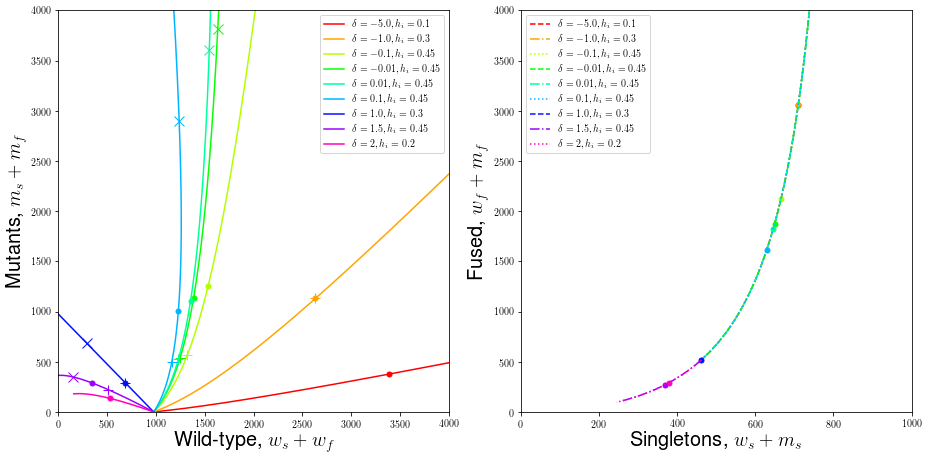

In [7]:
fig, axs = plt.subplots(1,2, figsize = (6.5*2,6.5))
axs = axs.ravel()

for i, param in enumerate(delta_param_sets):    
    ws_init,wf_init,ms_init,mf_init = plot_ss_line(axs, param, i, len(delta_param_sets))
    params.loc[i,'ws_init'] = ws_init
    params.loc[i,'wf_init'] = wf_init
    params.loc[i,'ms_init'] = ms_init
    params.loc[i,'mf_init'] = mf_init
    
    
    # if i == 1:
    #     pdb.set_trace()

plt.tight_layout()
plt.savefig('ss.png', dpi = 300)



In [10]:
params.to_csv('delta_sw_params.csv', index=False)
params

,xi,beta,gamma,kappa,b,mu,delta,h_target,ws_init,wf_init,ms_init,mf_init
0,0.0,33.12,0.037851,0.0,0.000012,0.023,-5.00,0.10,639.0,2749.0,71.0,306.0
1,0.0,33.12,0.037851,0.0,0.000012,0.023,-1.00,0.30,497.0,2137.0,213.0,917.0
2,0.0,33.12,0.037851,0.0,0.000012,0.023,-0.10,0.45,367.0,1169.0,299.0,954.0
3,0.0,33.12,0.037851,0.0,0.000012,0.023,-0.01,0.45,357.0,1029.0,292.0,843.0
4,0.0,33.12,0.037851,0.0,0.000012,0.023,0.01,0.45,355.0,1001.0,290.0,818.0
5,0.0,33.12,0.037851,0.0,0.000012,0.023,0.10,0.45,346.0,886.0,283.0,725.0
6,0.0,33.12,0.037851,0.0,0.000012,0.023,1.00,0.30,323.0,362.0,138.0,155.0
7,0.0,33.12,0.037851,0.0,0.000012,0.023,1.50,0.45,203.0,148.0,166.0,121.0
8,0.0,33.12,0.037851,0.0,0.000012,0.023,2.00,0.20,303.0,232.0,76.0,58.0
